In [7]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🌈 Set Style
sns.set_theme(style="whitegrid", palette="muted")

In [8]:
# 🧮 Model Evaluation Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'Neural Network'],
    'R²': [0.299, 0.476, 0.216, 0.343],
    'RMSE ($)': [250.09, 216.38, 264.58, 242.23],
    'MAE ($)': [180.56, 150.77, 190.83, 170.42]
})

display(results.style.background_gradient(subset=['R²'], cmap='Greens')
                .background_gradient(subset=['RMSE ($)', 'MAE ($)'], cmap='Reds'))

,Model,R²,RMSE ($),MAE ($)
0,Linear Regression,0.299000,250.090000,180.560000
1,Random Forest,0.476000,216.380000,150.770000
2,SVR,0.216000,264.580000,190.830000
3,Neural Network,0.343000,242.230000,170.420000


In [9]:
# 🏆 Sort models by RMSE (lower = better)
results_sorted = results.sort_values(by='RMSE ($)', ascending=True).reset_index(drop=True)
print("✅ Models sorted by RMSE (lower is better):")
display(results_sorted)

✅ Models sorted by RMSE (lower is better):


,Model,R²,RMSE ($),MAE ($)
0,Random Forest,0.476,216.38,150.77
1,Neural Network,0.343,242.23,170.42
2,Linear Regression,0.299,250.09,180.56
3,SVR,0.216,264.58,190.83


C:\Users\Mohit\AppData\Local\Temp\ipykernel_3640\3242419170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_sorted, palette='crest')
c:\ML_PROJECT\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


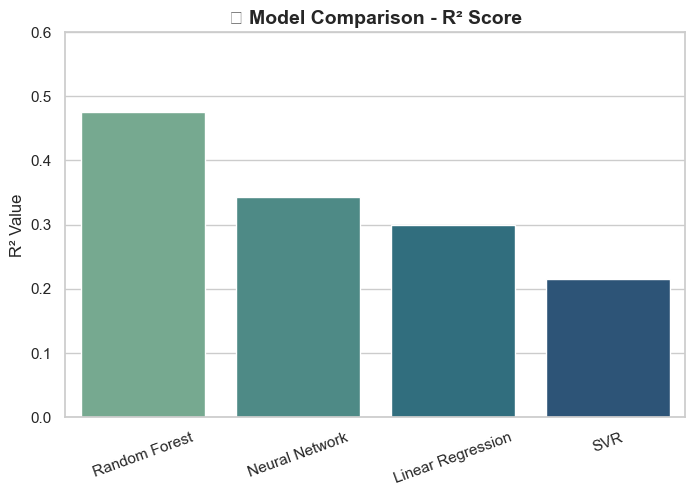

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R²', data=results_sorted, palette='crest')
plt.title("✨ Model Comparison - R² Score", fontsize=14, weight='bold')
plt.ylabel("R² Value")
plt.xlabel("")
plt.ylim(0, 0.6)
plt.xticks(rotation=20)
plt.show()

C:\Users\Mohit\AppData\Local\Temp\ipykernel_3640\3753250725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE ($)', data=results_sorted, palette='flare')
c:\ML_PROJECT\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


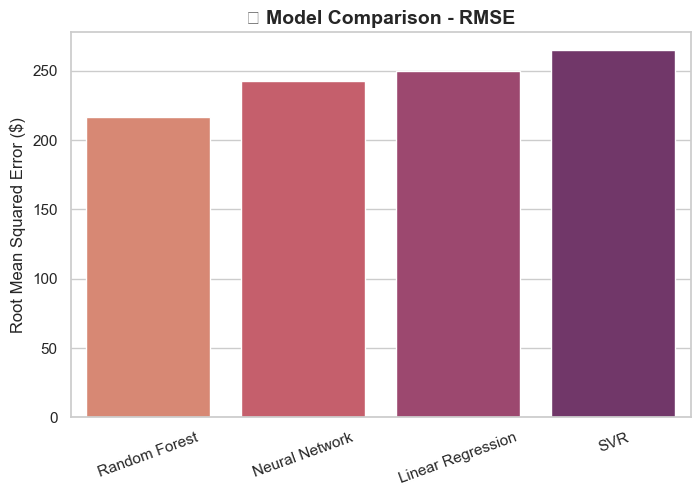

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE ($)', data=results_sorted, palette='flare')
plt.title("💰 Model Comparison - RMSE", fontsize=14, weight='bold')
plt.ylabel("Root Mean Squared Error ($)")
plt.xlabel("")
plt.xticks(rotation=20)
plt.show()

In [12]:
# 🌀 KMeans Clustering for Price Segmentation
# Load processed Airbnb dataset (combine train + test if available)
df_train = pd.read_csv('airbnb_train_processed.csv')

try:
    df_test = pd.read_csv('airbnb_test_processed.csv')
    df_full = pd.concat([df_train, df_test], ignore_index=True)
except FileNotFoundError:
    df_full = df_train.copy()

# Cluster only numeric columns (excluding price)
X = df_full.drop(columns=['price'], errors='ignore').select_dtypes(include=['int64', 'float64'])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_full['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate mean price per cluster
cluster_means = df_full.groupby('Cluster')['price'].mean().round(2)
cluster_summary = pd.DataFrame({'Cluster': cluster_means.index, 'Mean Price ($)': cluster_means.values})

display(cluster_summary.style.background_gradient(cmap='YlGn'))

,Cluster,Mean Price ($)
0,0,448.730000
1,1,158.820000
2,2,150.900000
3,3,197.870000
4,4,291.700000


In [13]:
print("🏷️ KMeans Clustering (Mean Price per Segment):")
for idx, val in zip(cluster_summary['Cluster'], cluster_summary['Mean Price ($)']):
    print(f"- Cluster {idx}: ${val:.2f}")

🏷️ KMeans Clustering (Mean Price per Segment):
- Cluster 0: $448.73
- Cluster 1: $158.82
- Cluster 2: $150.90
- Cluster 3: $197.87
- Cluster 4: $291.70


In [14]:
best_by_r2 = results.loc[results['R²'].idxmax()]
best_by_rmse = results.loc[results['RMSE ($)'].idxmin()]

print("🏆 Best Model Based on R²:")
print(f"➡️ {best_by_r2['Model']} (R² = {best_by_r2['R²']:.3f})")

print("\n🏆 Best Model Based on RMSE:")
print(f"➡️ {best_by_rmse['Model']} (RMSE = ${best_by_rmse['RMSE ($)']:.2f})")

🏆 Best Model Based on R²:
➡️ Random Forest (R² = 0.476)

🏆 Best Model Based on RMSE:
➡️ Random Forest (RMSE = $216.38)


In [15]:
print("""
# 🧾 Final Conclusion

After evaluating multiple models for Airbnb Price Prediction:

✅ **Random Forest** achieved the best overall performance —
   Highest R² (0.476) and lowest RMSE ($216.38),
   indicating strong predictive capability for Airbnb price prediction.

🔹 **Neural Network** performed moderately well (R² ≈ 0.34),
   showing potential with further tuning (e.g., more epochs or learning rate optimization).

🔸 **Linear Regression** and **SVR** underperformed due to limited ability
   to capture non-linear relationships in the data.

🌀 **KMeans Clustering** provided valuable segmentation insights —
   revealing distinct average price ranges across customer groups.

📊 **Final Decision:** Random Forest is selected as the final model for Airbnb price prediction.
""")


# 🧾 Final Conclusion

After evaluating multiple models for Airbnb Price Prediction:

✅ **Random Forest** achieved the best overall performance —
   Highest R² (0.476) and lowest RMSE ($216.38),
   indicating strong predictive capability for Airbnb price prediction.

🔹 **Neural Network** performed moderately well (R² ≈ 0.34),
   showing potential with further tuning (e.g., more epochs or learning rate optimization).

🔸 **Linear Regression** and **SVR** underperformed due to limited ability
   to capture non-linear relationships in the data.

🌀 **KMeans Clustering** provided valuable segmentation insights —
   revealing distinct average price ranges across customer groups.

📊 **Final Decision:** Random Forest is selected as the final model for Airbnb price prediction.

